In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

%matplotlib inline

In [19]:
files = glob.glob('*csv')
files

['11_8.csv',
 '25_3.csv',
 '31_5.csv',
 '33_2.csv',
 '35_1.csv',
 '35_6.csv',
 '41_7.csv',
 '41_8.csv',
 '7_2.csv']

In [20]:
data = pd.read_csv(files[0])
data

,localDatetime,duration,rawData,index,electricCurrent0,cgmGlucoseValue,slope,intercept
0,2.020030e+13,0.016667,b1000001027f00008ed500047e05c89cd60057,1,6.39,55,10.00,-10.00
1,2.020030e+13,0.033333,b1000001027f00008ed500047e05c89cd60057,2,11.50,102,10.00,-10.00
2,2.020030e+13,0.050000,b100000304351036a1d600042f03b6a3d6000f,3,10.77,93,10.00,-10.00
3,2.020030e+13,0.066667,b100000304351036a1d600042f03b6a3d6000f,4,10.71,91,10.00,-10.00
4,2.020030e+13,0.083333,b100000504270f32a5d600042b0316a6d60061,5,10.63,90,10.00,-10.00
5,2.020030e+13,0.100000,b100000504270f32a5d600042b0316a6d60061,6,10.67,89,10.00,-10.00
6,2.020030e+13,0.116667,b1000007044a0f14a6d600044a02e4a7d60056,7,10.98,92,10.00,-10.00
7,2.020030e+13,0.133333,b1000007044a0f14a6d600044a02e4a7d60056,8,10.98,92,10.00,-10.00
8,2.020030e+13,0.150000,000009044a0f14044a02e404500f1e00a8d6b2,9,11.04,92,10.00,-10.00
9,2.020030e+13,0.166667,b100000a042802bca8d60004070faaa7d60064,10,10.64,88,10.00,-10.00


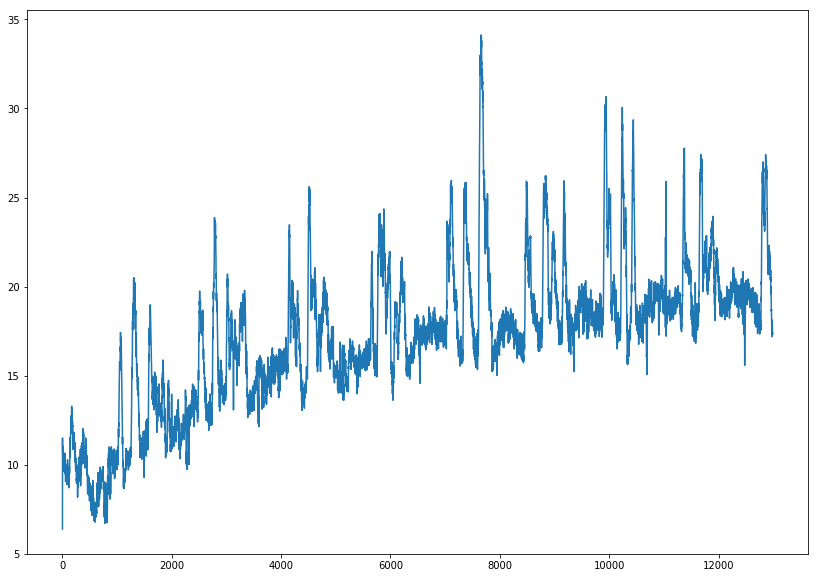

In [21]:
plt.figure(figsize=(14,10))
plt.plot(data['electricCurrent0'])
plt.show()

In [22]:
def convert_to_hour(data):
    hour_datas = []
    for i in range(len(data) // 60):
        hour_data = data[i*60:i*60+60].mean()
        hour_datas.append(hour_data)
    return np.array(hour_datas)

In [23]:
convert_to_hour(data['electricCurrent0']), convert_to_hour(data['electricCurrent0']).shape

(array([10.03      ,  9.431     , 11.35216667, 11.21283333,  9.44216667,
        10.04766667, 10.8085    ,  9.85283333,  8.45733333,  7.73016667,
         7.8585    ,  9.09833333,  8.64616667,  8.36816667,  9.88183333,
        10.25016667, 10.18933333, 14.93483333, 10.8295    , 10.14983333,
        10.41516667, 17.58083333, 16.7525    , 12.08966667, 10.85216667,
        11.41016667, 15.93166667, 14.482     , 13.716     , 13.49866667,
        14.01766667, 11.72983333, 12.94083333, 11.64366667, 12.05866667,
        12.01916667, 11.77166667, 11.971     , 12.55616667, 13.41083333,
        13.5715    , 15.713     , 17.77516667, 14.24583333, 12.85216667,
        14.13333333, 21.60816667, 15.92783333, 14.6045    , 14.11216667,
        18.25716667, 17.157     , 16.42733333, 16.15916667, 18.22283333,
        18.37883333, 14.06683333, 13.61533333, 14.085     , 14.182     ,
        15.1995    , 14.35483333, 14.52766667, 15.03483333, 15.3515    ,
        15.286     , 15.5525    , 15.89066667, 16.3

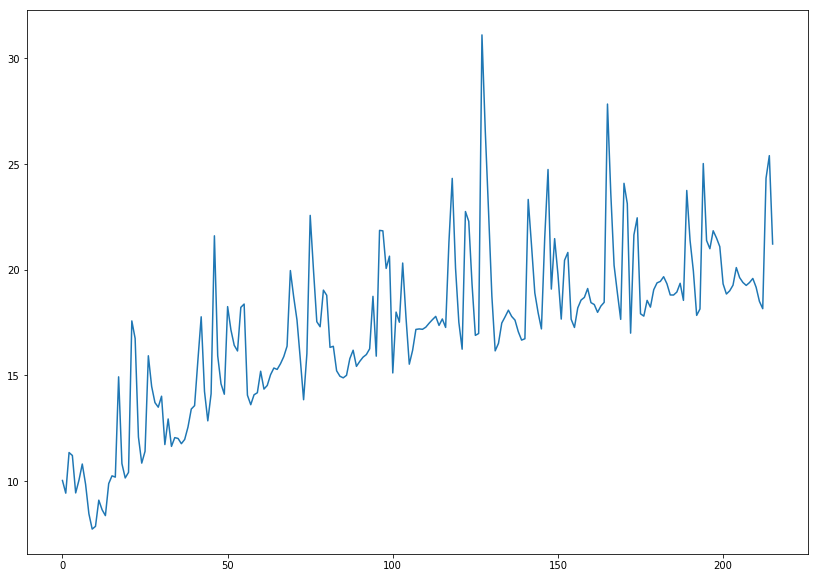

In [24]:
plt.figure(figsize=(14,10))
plt.plot(convert_to_hour(data['electricCurrent0']))
plt.show()

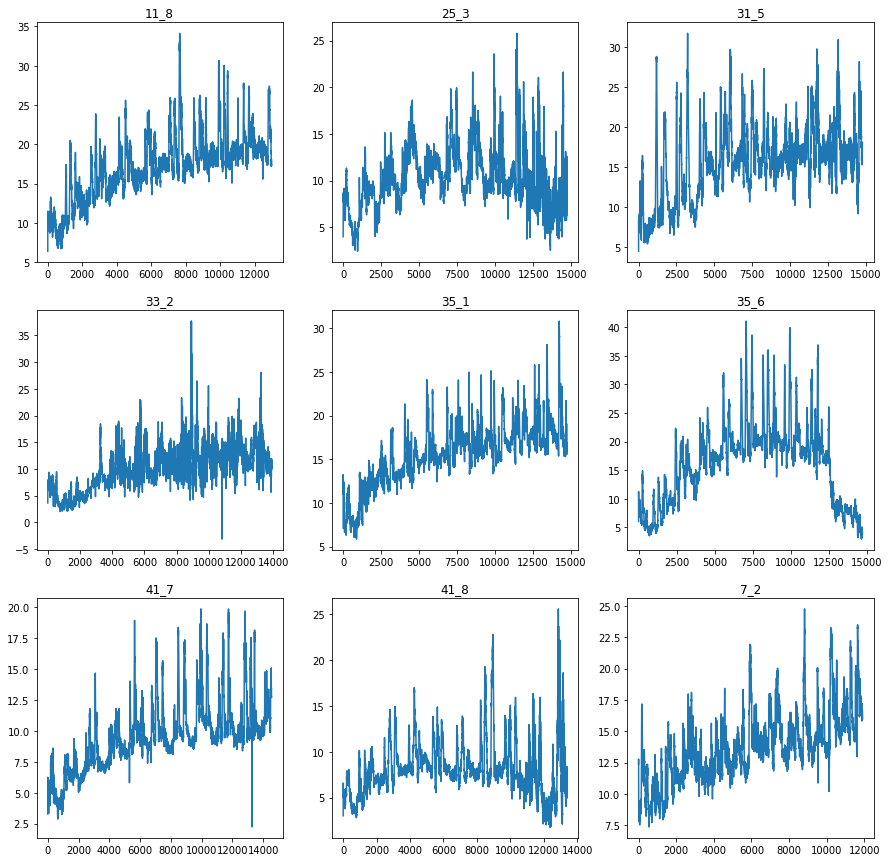

In [25]:
plt.figure(figsize=(15,15))
for i in range(len(files)):
    plt.subplot(3,3,i+1)
    data = pd.read_csv(files[i])
    plt.plot(data['electricCurrent0'])
    plt.title(files[i].split('.')[0])

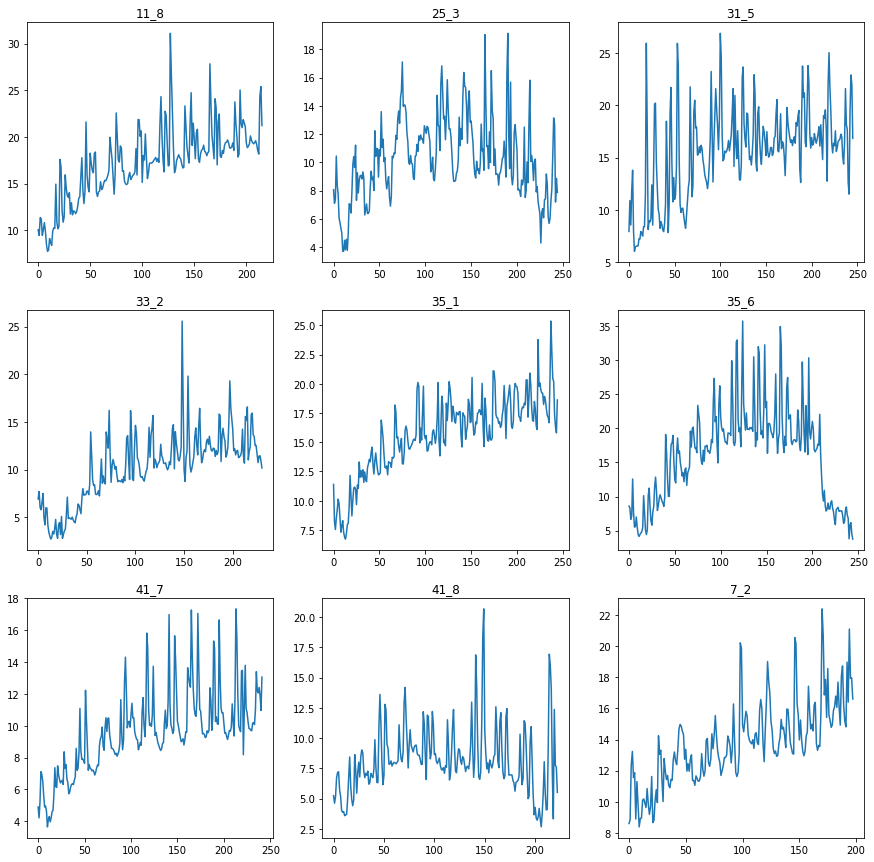

In [26]:
plt.figure(figsize=(15,15))
for i in range(len(files)):
    plt.subplot(3,3,i+1)
    data = pd.read_csv(files[i])
    plt.plot(convert_to_hour(data['electricCurrent0']))
    plt.title(files[i].split('.')[0])

In [27]:
datas = []
for file in files:
    data = pd.read_csv(file)
    datas.append(data.electricCurrent0.values.astype('float32'))
    
datas = np.array(datas)
datas.shape, datas.dtype

((9,), dtype('O'))

In [28]:
file_time = []
for file in files:
    data = pd.read_csv(file)
    time = len(data)
    file_time.append(time)
file_time

[12991, 14712, 14772, 13893, 14737, 14725, 14539, 13397, 11899]

In [29]:
datas = np.array([a[:11899] for a in datas], dtype='float32')

In [30]:
datas.shape, datas.dtype

((9, 11899), dtype('float32'))

In [31]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=3)
labels = cluster.fit_predict(datas)
labels

array([0, 1, 0, 1, 0, 2, 1, 1, 0])

In [32]:
def plot_label(n_clusters):
    for label in range(n_clusters):
        label_files = [file for file, label_ in zip(files, labels) if label_ == label]
        plt.figure(figsize=(15,15))
        plt.suptitle('cluster label ' + str(label),fontsize=20)
        for i, label_file in enumerate(label_files):
            plt.subplot(3,3,i+1)
            data = pd.read_csv(label_file)
            plt.plot(data['electricCurrent0'][:11899])
            plt.title(label_file.split('.')[0])

In [33]:
def plot_label_box(n_clusters):
    for label in range(n_clusters):
        label_files = [file for file, label_ in zip(files, labels) if label_ == label]
        plt.figure(figsize=(15,15))
        plt.suptitle('cluster label ' + str(label),fontsize=20)
        for i, label_file in enumerate(label_files):
            plt.subplot(3,3,i+1)
            data = pd.read_csv(label_file)
            sns.boxplot(data['electricCurrent0'][:11899])
            plt.title(label_file.split('.')[0])

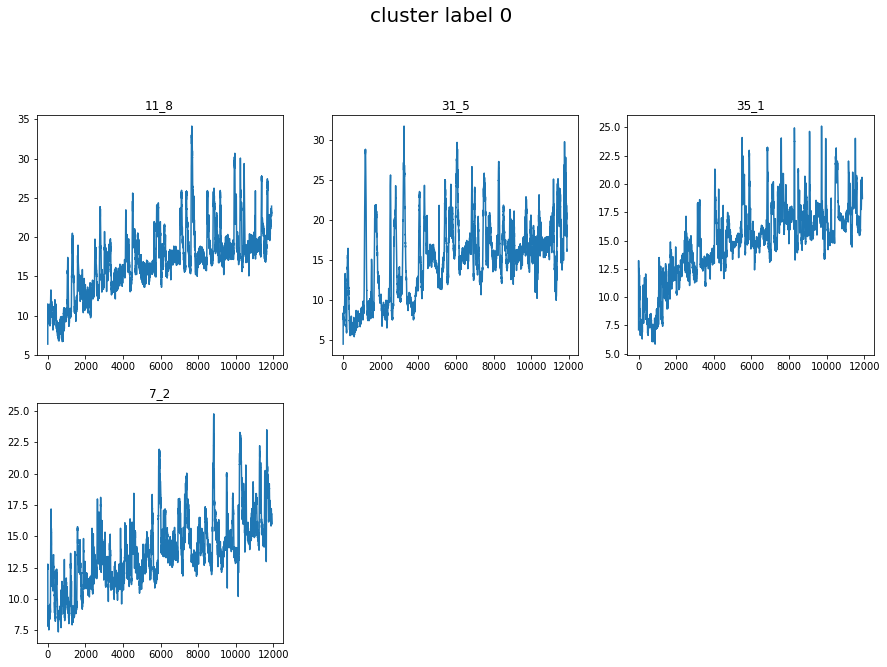

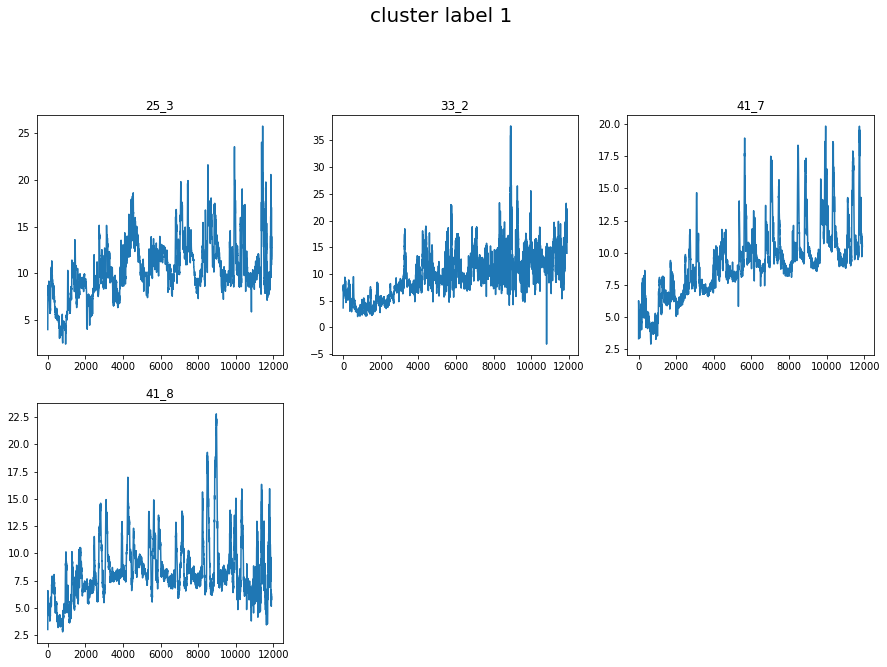

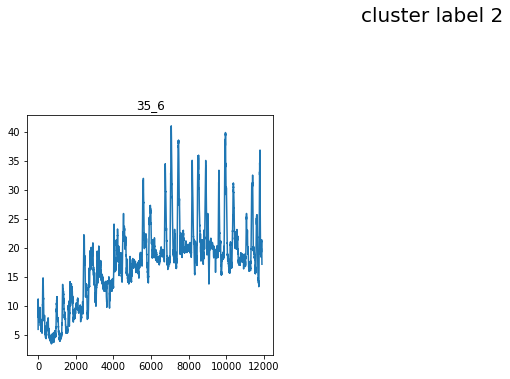

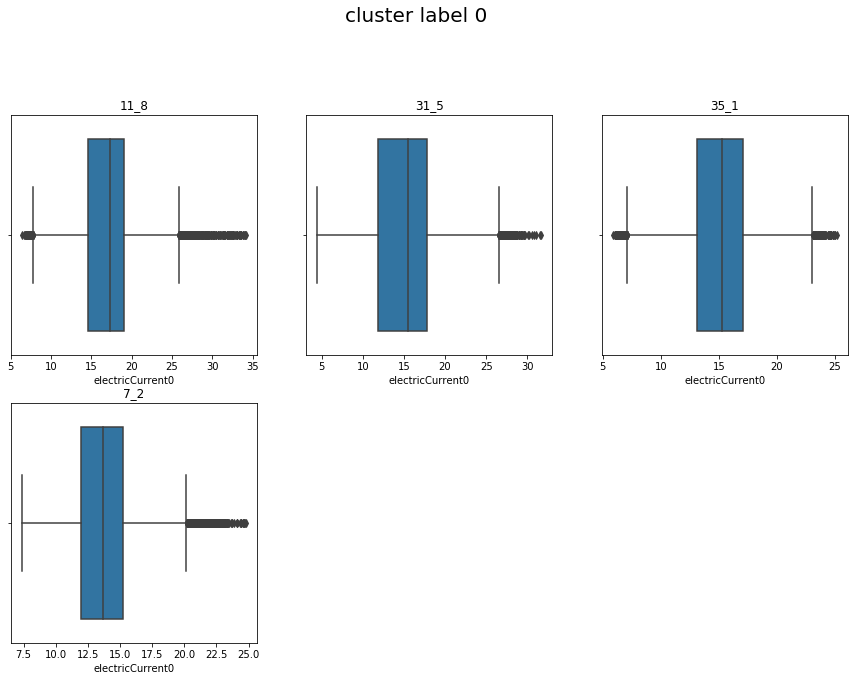

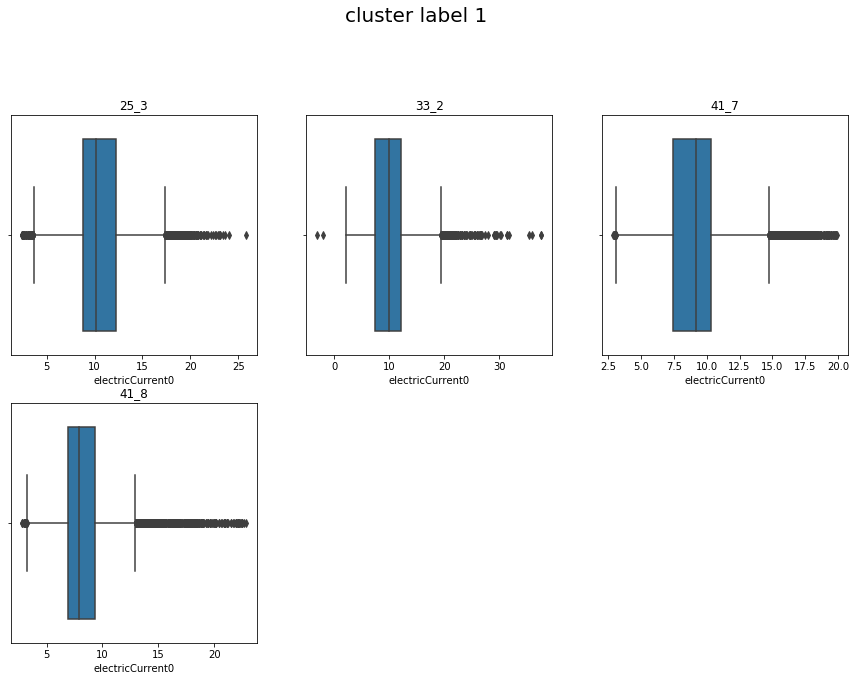

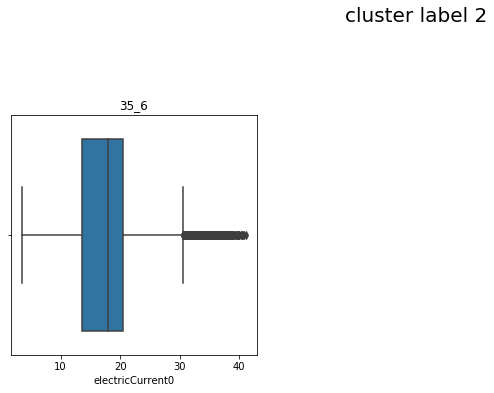

In [34]:
plot_label(3)
plot_label_box(3)

In [35]:
cluster2 = KMeans(n_clusters=2)
labels = cluster2.fit_predict(datas)
labels

array([1, 0, 1, 0, 1, 1, 0, 0, 1])

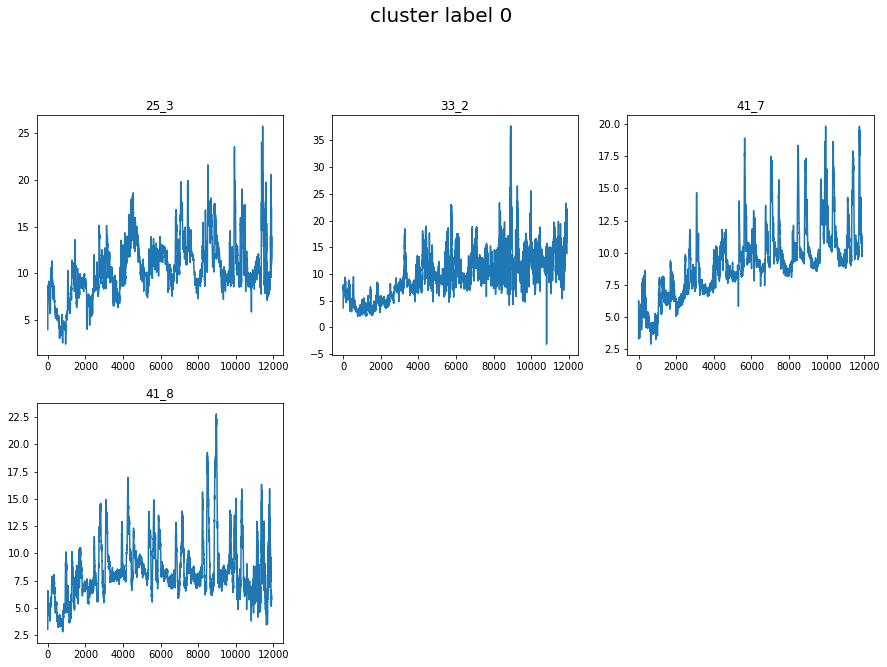

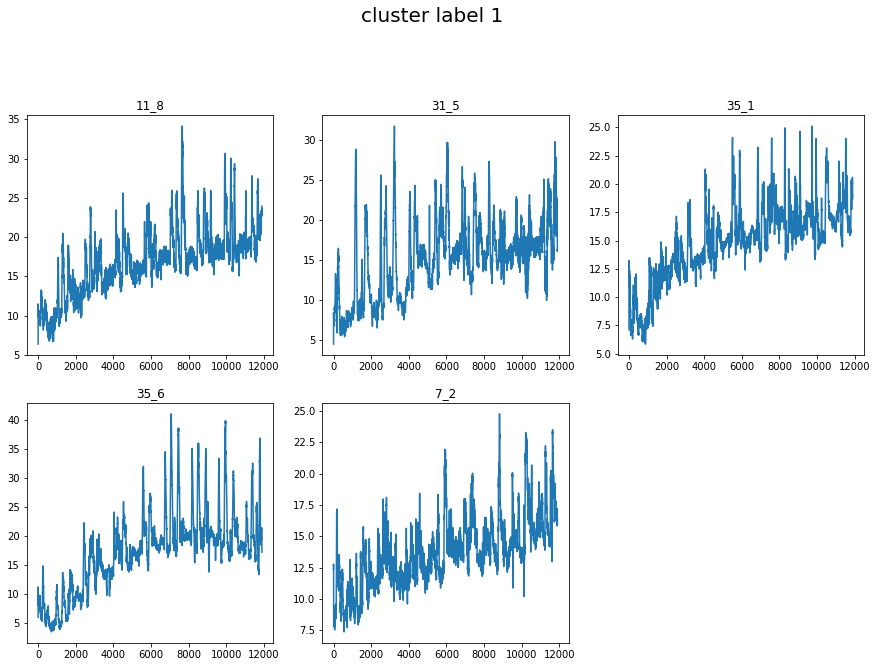

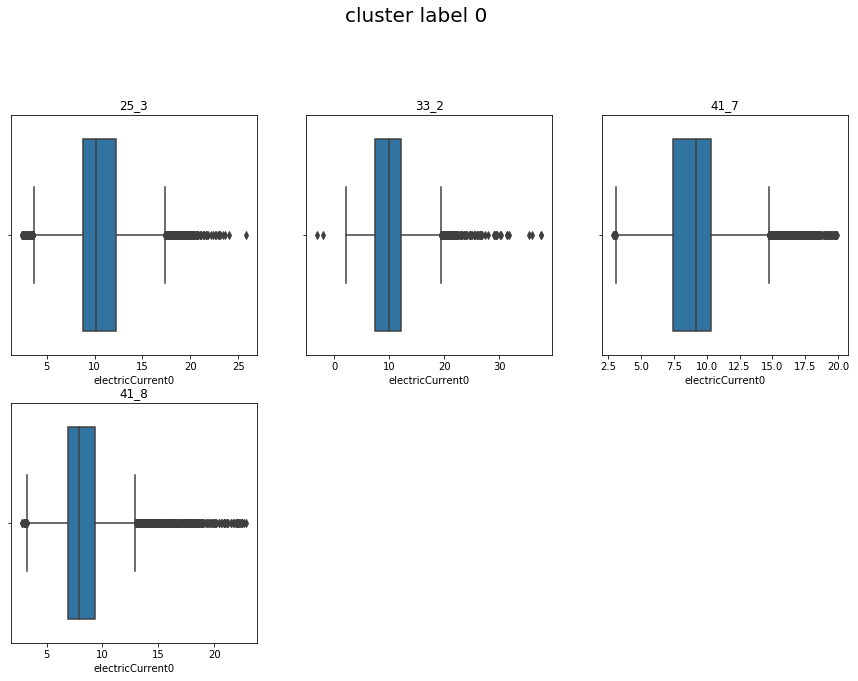

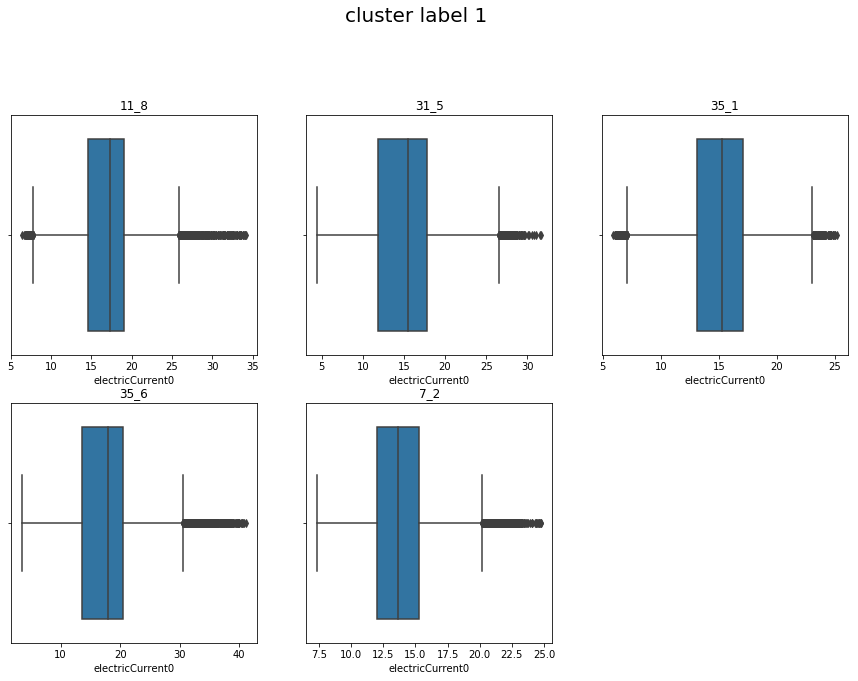

In [36]:
plot_label(2)
plot_label_box(2)

In [37]:
cluster3 = KMeans(n_clusters=4)
labels = cluster3.fit_predict(datas)
labels

array([2, 0, 3, 0, 2, 1, 0, 0, 2])

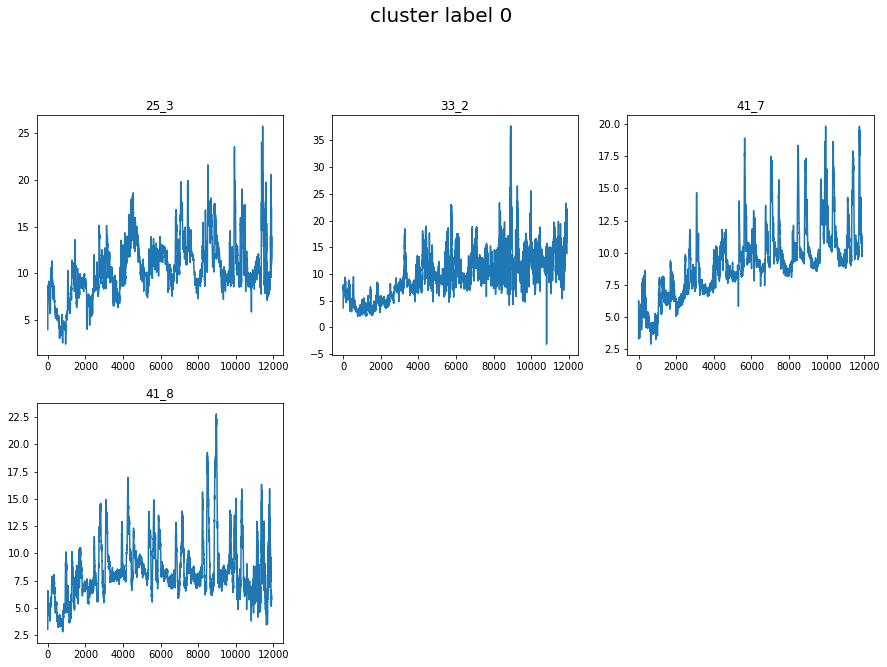

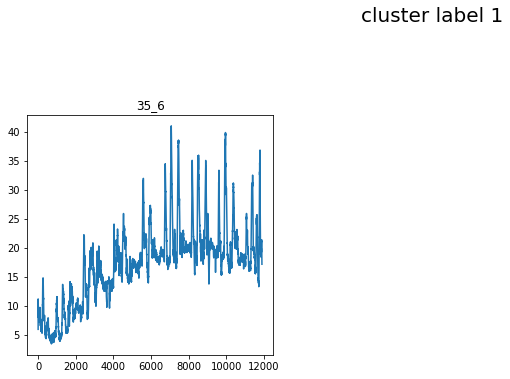

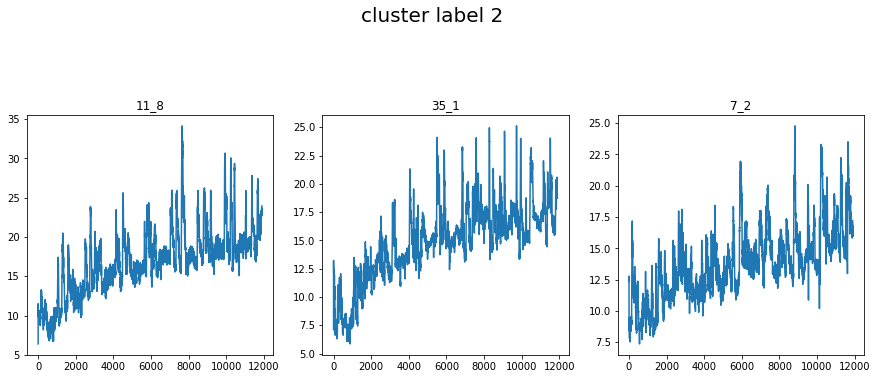

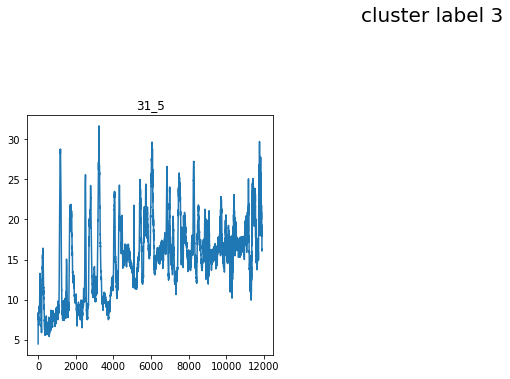

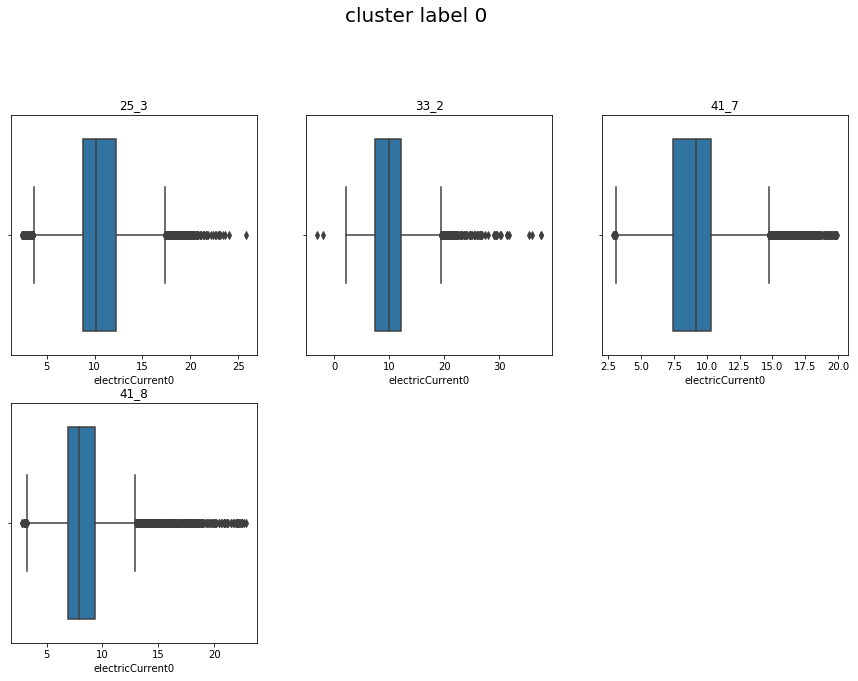

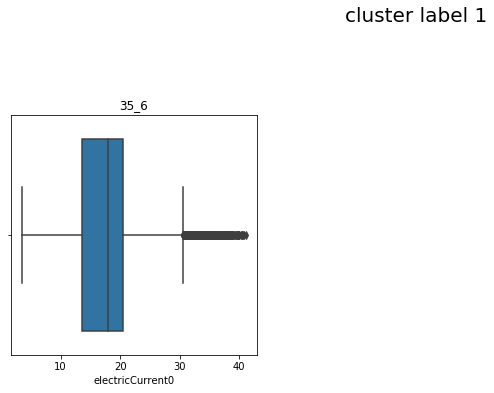

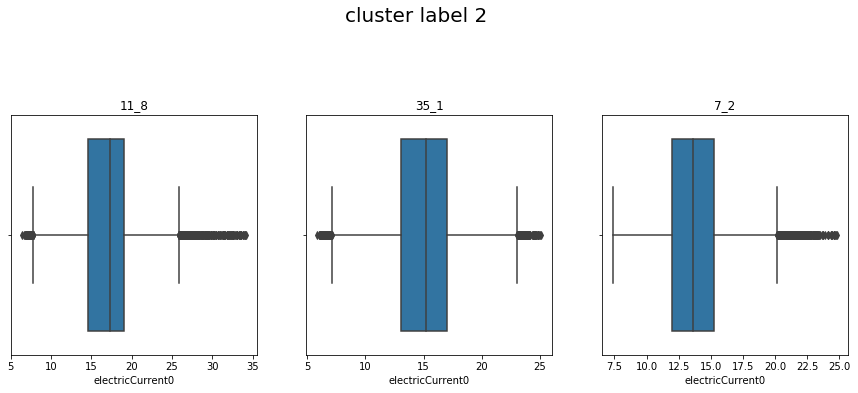

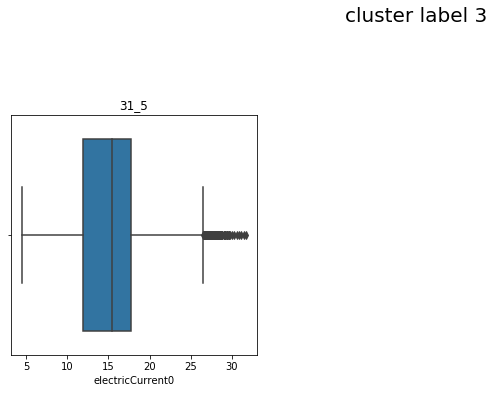

In [38]:
plot_label(4)
plot_label_box(4)

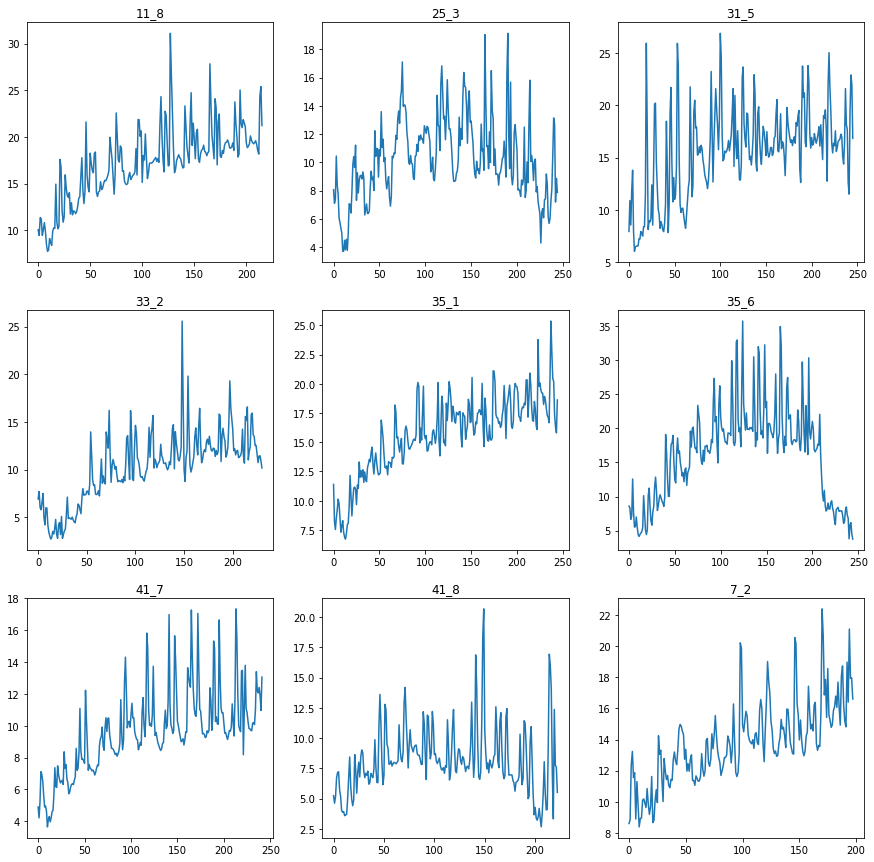

In [39]:
plt.figure(figsize=(15,15))
for i in range(len(files)):
    plt.subplot(3,3,i+1)
    data = pd.read_csv(files[i])
    plt.plot(convert_to_hour(data['electricCurrent0']))
    plt.title(files[i].split('.')[0])

In [40]:
file_time = []
for file in files:
    data = pd.read_csv(file)
    time = len(convert_to_hour(data['electricCurrent0']))
    file_time.append(time)
file_time

[216, 245, 246, 231, 245, 245, 242, 223, 198]

In [41]:
datas_h = []
for file in files:
    data = pd.read_csv(file)
    datas_h.append(convert_to_hour(data['electricCurrent0']))
    
datas_h = np.array(datas_h)

datas_h = np.array([a[:198] for a in datas_h], dtype='float32')
datas_h.shape, datas_h.dtype

((9, 198), dtype('float32'))

In [42]:
def plot_label_h(n_clusters):
    for label in range(n_clusters):
        label_files = [file for file, label_ in zip(files, labels_h) if label_ == label]
        plt.figure(figsize=(15,15))
        plt.suptitle('cluster label ' + str(label),fontsize=20)
        for i, label_file in enumerate(label_files):
            plt.subplot(3,3,i+1)
            data = pd.read_csv(label_file)
            plt.plot(convert_to_hour(data['electricCurrent0'])[:198])
            plt.title(label_file.split('.')[0])

In [43]:
def plot_label_box_h(n_clusters):
    for label in range(n_clusters):
        label_files = [file for file, label_ in zip(files, labels_h) if label_ == label]
        plt.figure(figsize=(15,15))
        plt.suptitle('cluster label ' + str(label),fontsize=20)
        for i, label_file in enumerate(label_files):
            plt.subplot(3,3,i+1)
            data = pd.read_csv(label_file)
            sns.boxplot(convert_to_hour(data['electricCurrent0'])[:198])
            plt.title(label_file.split('.')[0])

In [44]:
from sklearn.cluster import KMeans

cluster_h = KMeans(n_clusters=3)
labels_h = cluster_h.fit_predict(datas_h)
labels_h

array([2, 0, 2, 0, 2, 1, 0, 0, 2])

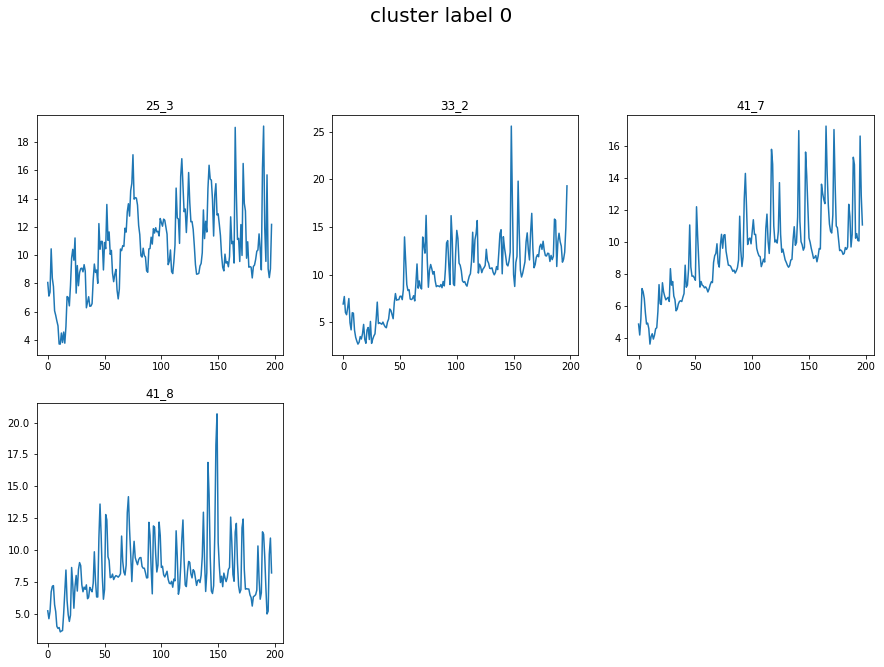

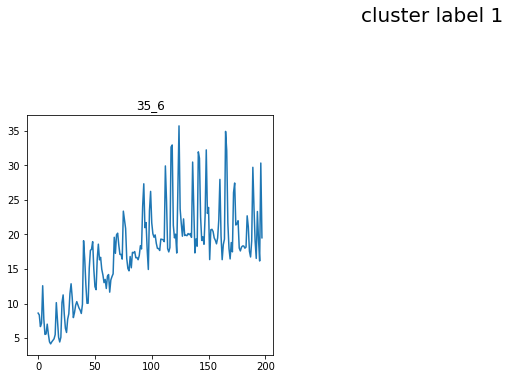

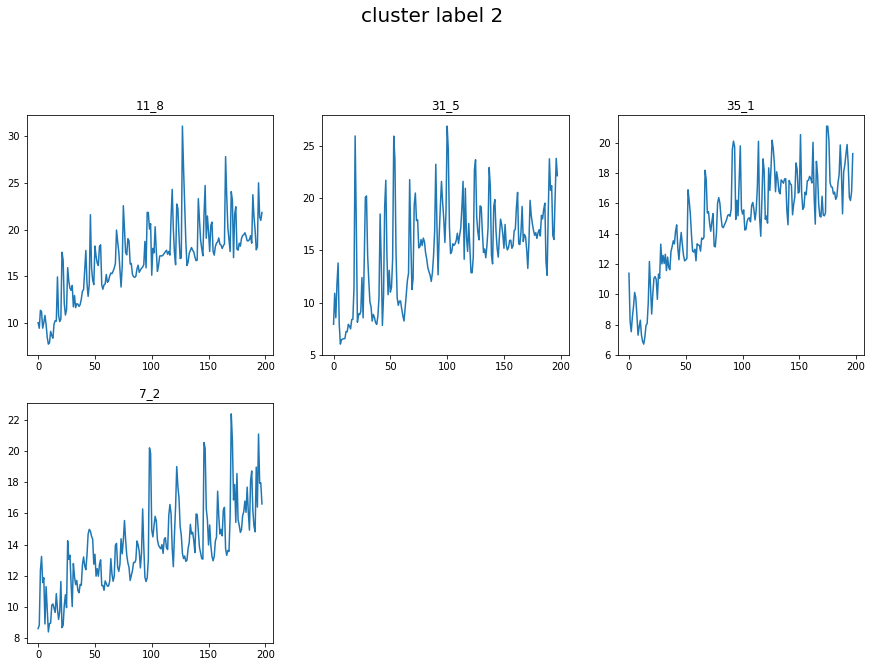

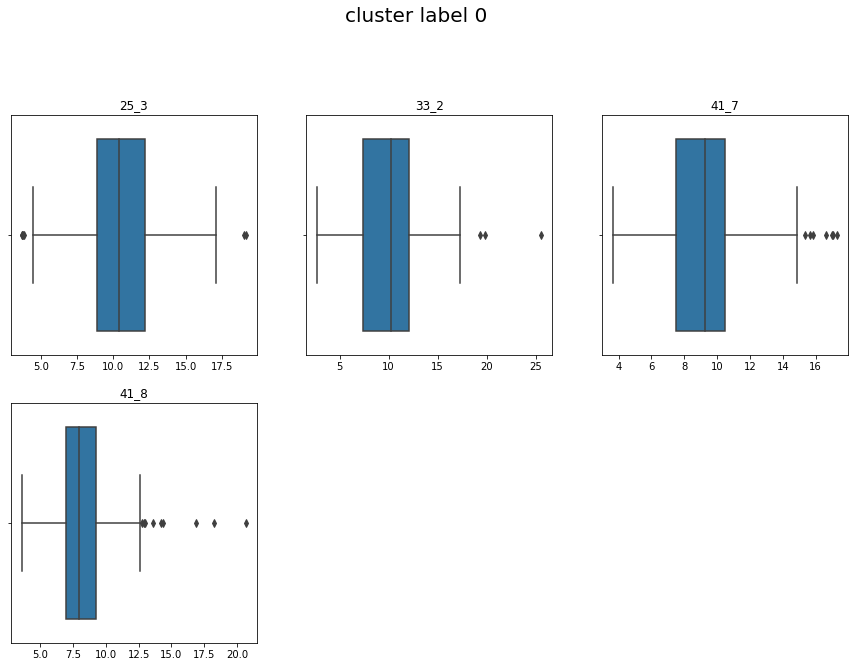

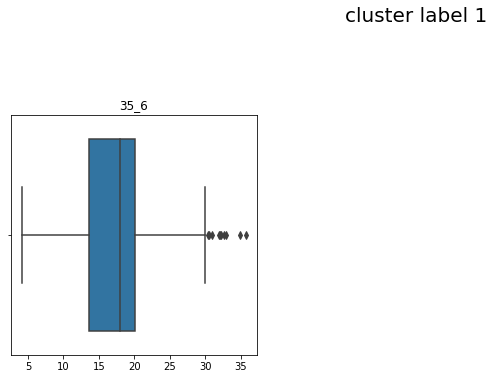

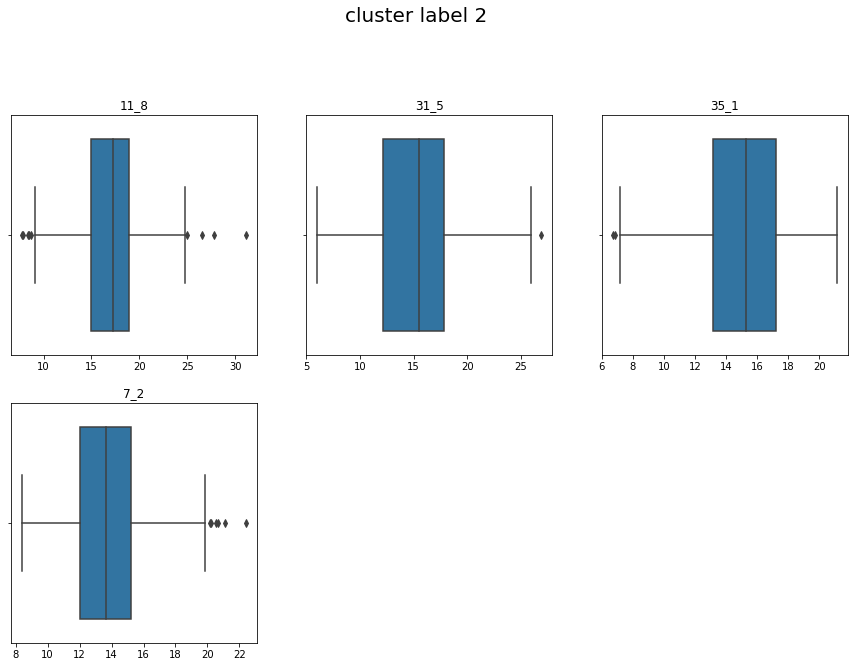

In [45]:
plot_label_h(3)
plot_label_box_h(3)

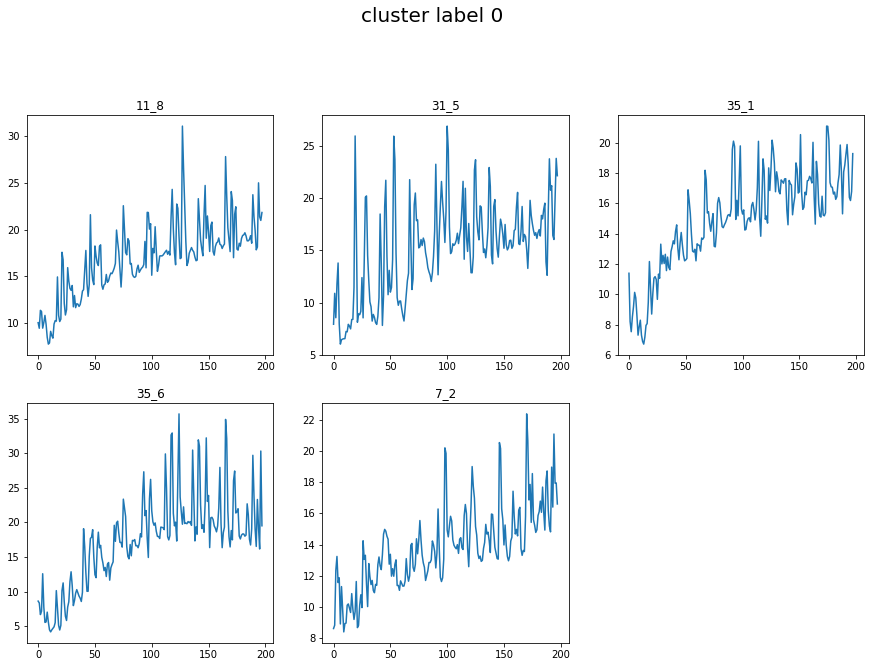

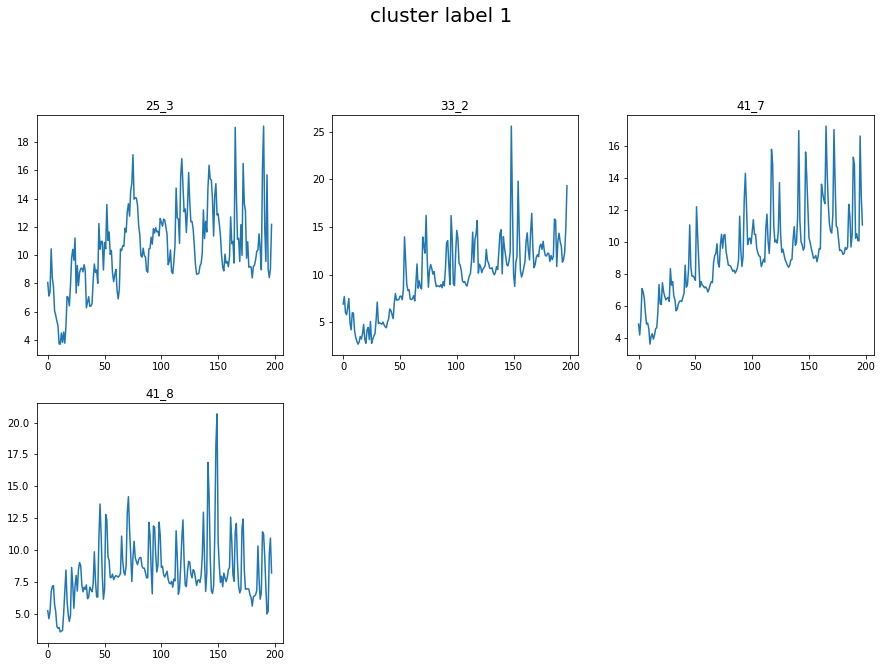

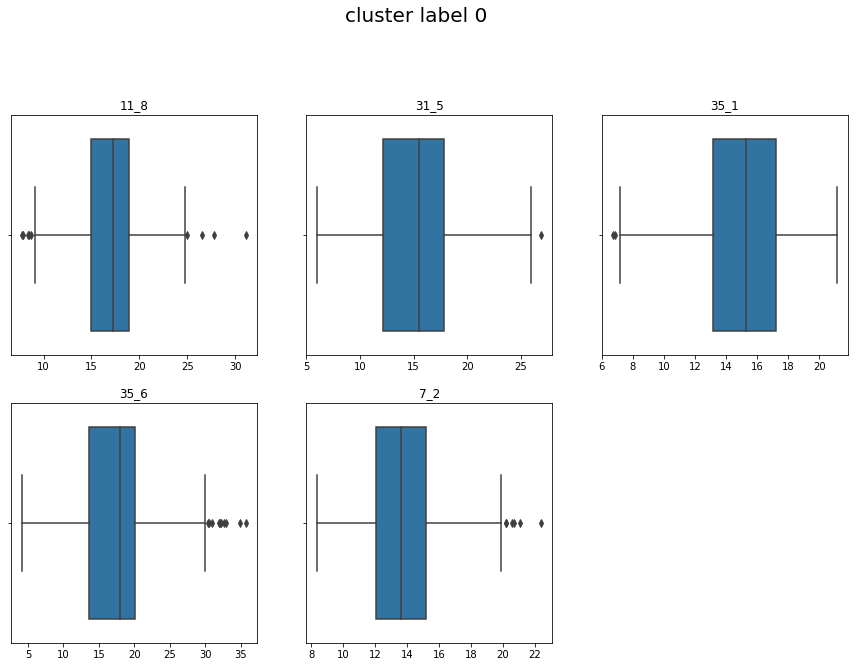

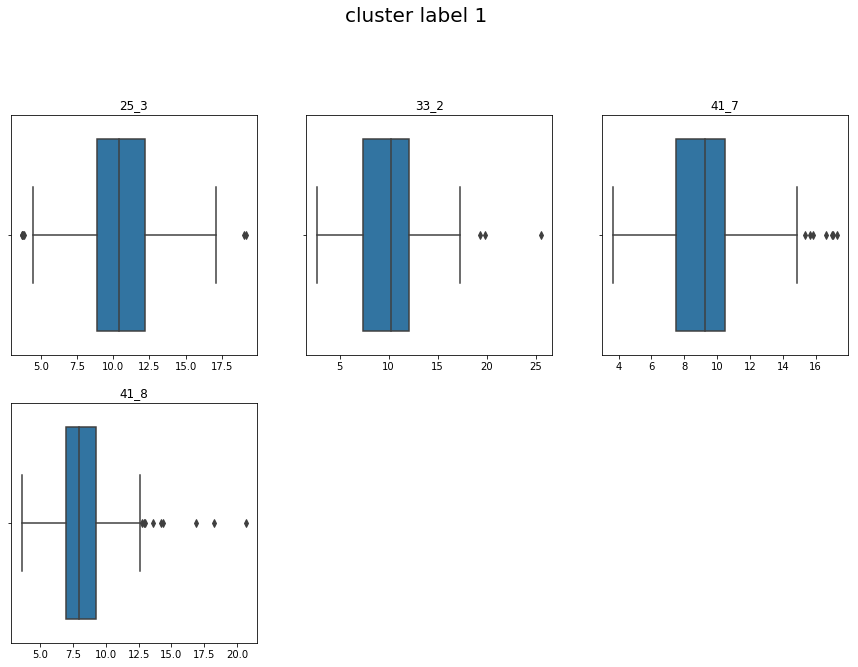

In [46]:
from sklearn.cluster import KMeans

cluster_h2 = KMeans(n_clusters=2)
labels_h = cluster_h2.fit_predict(datas_h)

plot_label_h(2)
plot_label_box_h(2)

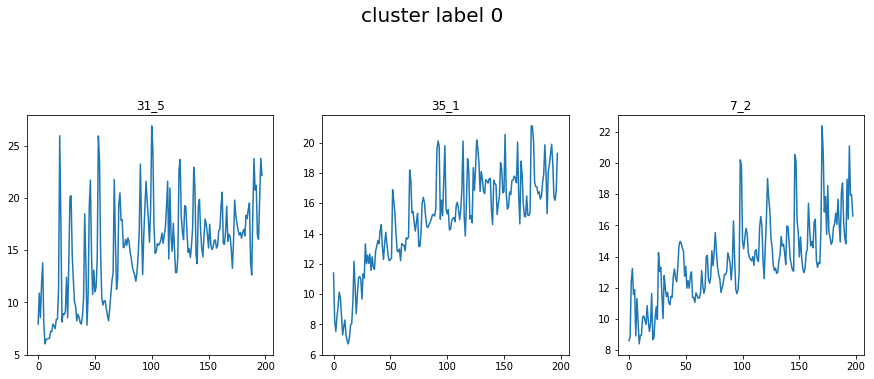

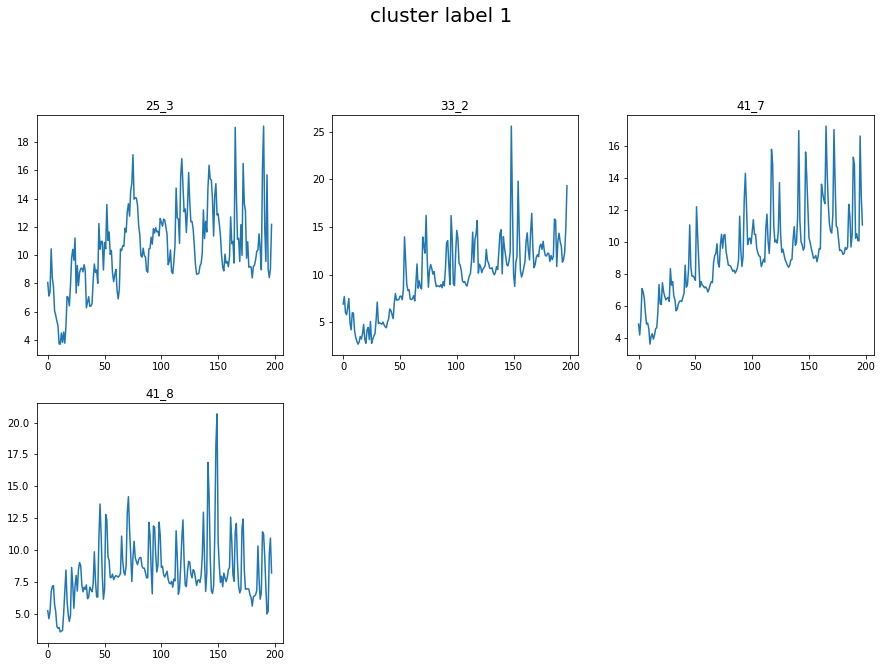

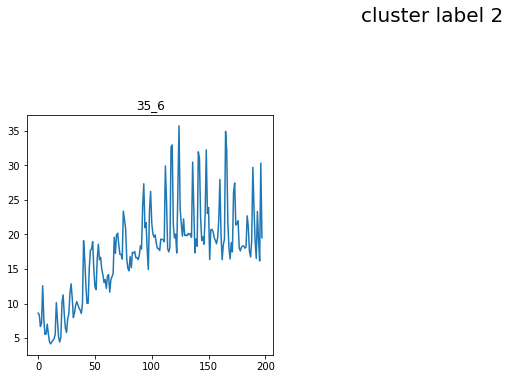

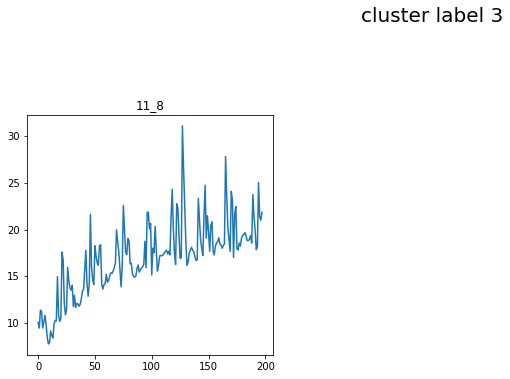

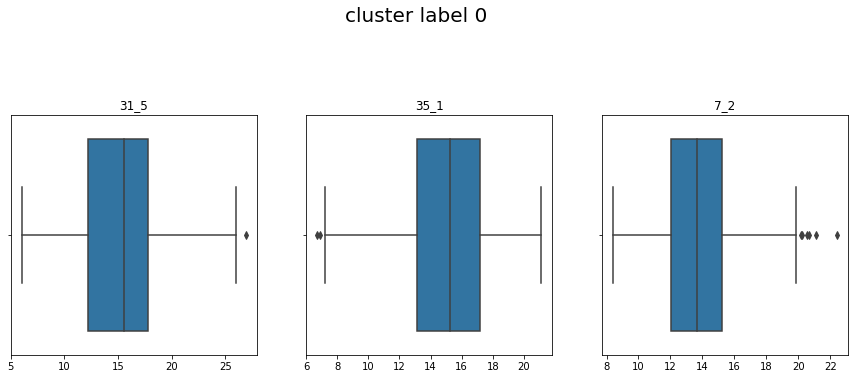

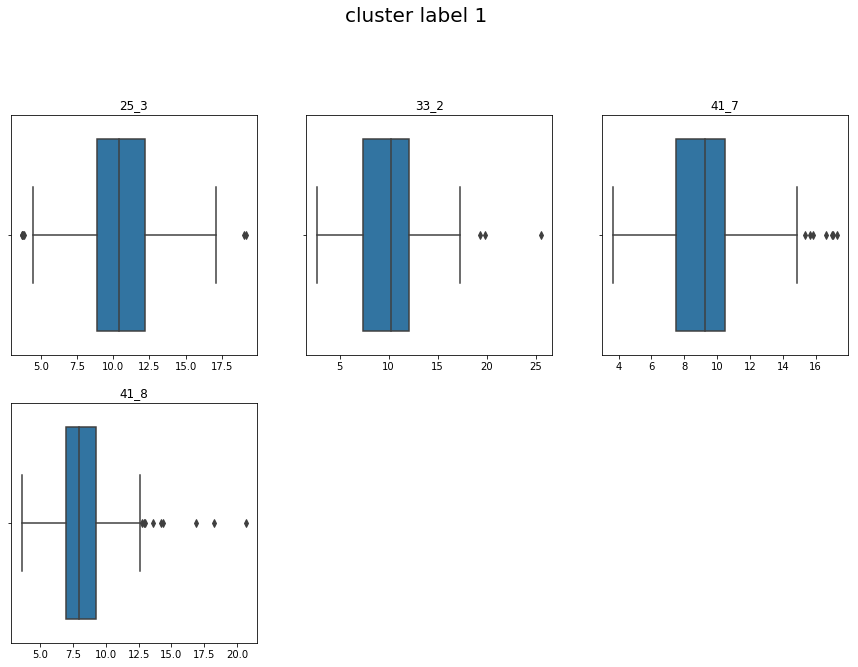

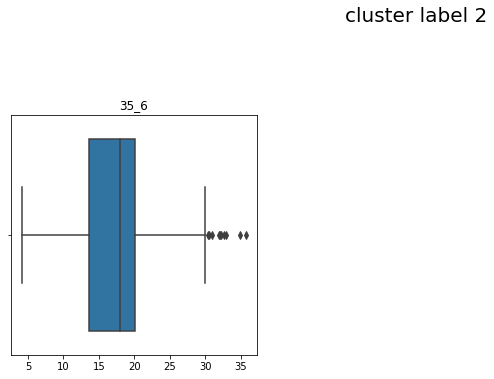

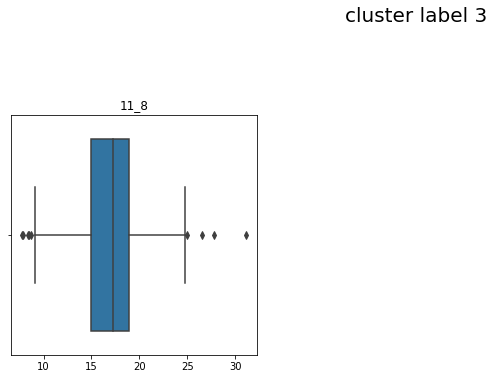

In [47]:
from sklearn.cluster import KMeans

cluster_h3 = KMeans(n_clusters=4)
labels_h = cluster_h3.fit_predict(datas_h)

plot_label_h(4)
plot_label_box_h(4)